In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/NLP Dataset.xlsx")

In [ ]:
df

,Year,Title,Human,GPT-4,DeepSeek,Gemini,C_Jugde,D_Judge,G_Judge
0,1905,The Gift of the Magi,One dollar and eighty-seven cents. That was al...,Snow blanketed the streets of their small town...,Lena and Marco had been together for five year...,The biting December wind whipped through the n...,6.5,5.0,7.5
1,1974,A Story,In the garden all the apple-trees were in blos...,Pastor Elijah Thorne was a man of fire and scr...,Pastor Elias Graves had always preached fire a...,The Reverend Samuel Blackwood was a pillar of ...,9.0,9.5,9.0
2,1855,By the Almshouse Window,Near the grass-covered rampart which encircles...,"Every afternoon at three, Miss Adelaide Finch ...",Agnes Whitlow sat by the narrow window of her ...,"Elara's room in the almshouse was small, a spa...",9.5,8.0,8.0
3,1948,The Angel,"""Whenever a good child dies, an angel of God c...",The wind whispered through the clouds as the a...,"The angel found the boy at dusk, curled in the...","The angel Gabriel descended, his wings like sp...",9.5,10.0,9.5
4,1859,Anne Lisbeth,"Anne Lisbeth was a beautiful young woman, with...","In the village of Marenshire, where gulls crie...",Madame Durand had been nursing the Count’s sic...,The salt-laced wind whipped Elara’s hair acros...,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...
75,2003,NaN,"The first effect, which this book has upon the...",It begins with a paradox: the golden age of Au...,1. The Book That Tried to Resurrect an Empire\...,"The weight of Blackwell's ""Memoirs of the Cour...",8.0,9.0,7.0
76,2003,NaN,"It will certainly be required, that notice sho...",In an age where falling apples explained the h...,The Clockmaker's Gambit (Historical Frame)\nWh...,The intellectual landscape of the 18th century...,7.0,8.0,9.0
77,2015,NaN,Student : Good Morning Sir..!\nClerk : Good Mo...,"Student: Good morning, Sir. I’m here to collec...",Student: (knocks on the office door) Good morn...,"Student: Good morning, Ma'am.\n\nClerk: (Looks...",8.0,9.0,9.0
78,2015,NaN,Student : Good Morning Sir..!\nOffice clerk : ...,"Student: Good morning, Sir. I wanted to ask ab...",Student: (approaches the counter) Good morning...,"Student: Excuse me, good afternoon. I was hopi...",8.0,9.0,10.0


In [ ]:
stop_words = set(stopwords.words('english'))
punct_table = str.maketrans('', '', string.punctuation)

In [ ]:
# Preprocessing
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = text.translate(punct_table)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
for col in ['Human', 'GPT-4', 'DeepSeek', 'Gemini']:
  df[col] = df[col].apply(preprocess_text)

In [ ]:
df

,Year,Title,Human,GPT-4,DeepSeek,Gemini,C_Jugde,D_Judge,G_Judge
0,1905,The Gift of the Magi,one dollar eightyseven cents sixty cents penni...,snow blanketed streets small town streetlights...,lena marco together five years though tiny apa...,biting december wind whipped narrow streets sw...,6.5,5.0,7.5
1,1974,A Story,garden appletrees blossom hastened bring forth...,pastor elijah thorne man fire scripture thirty...,pastor elias graves always preached fire brims...,reverend samuel blackwood pillar community ste...,9.0,9.5,9.0
2,1855,By the Almshouse Window,near grasscovered rampart encircles copenhagen...,every afternoon three miss adelaide finch took...,agnes whitlow sat narrow window tiny room st m...,elaras room almshouse small space defined narr...,9.5,8.0,8.0
3,1948,The Angel,whenever good child dies angel god comes heave...,wind whispered clouds angel descended wings pa...,angel found boy dusk curled corner crumbling t...,angel gabriel descended wings like spun moonli...,9.5,10.0,9.5
4,1859,Anne Lisbeth,anne lisbeth beautiful young woman red white c...,village marenshire gulls cried gray cliffs sea...,madame durand nursing count ’ sickly infant th...,saltlaced wind whipped elara ’ hair across fac...,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...
75,2003,NaN,first effect book upon reader disgusting autho...,begins paradox golden age augustus time radian...,1 book tried resurrect empire thomas blackwell...,weight blackwells memoirs court augustus 1753 ...,8.0,9.0,7.0
76,2003,NaN,certainly required notice taken book however s...,age falling apples explained heavens calculus ...,clockmakers gambit historical frame young cler...,intellectual landscape 18th century world grap...,7.0,8.0,9.0
77,2015,NaN,student good morning sir clerk good morning ad...,student good morning sir ’ collect scholarship...,student knocks office door good morning ’ cler...,student good morning maam clerk looks desk goo...,8.0,9.0,9.0
78,2015,NaN,student good morning sir office clerk good mor...,student good morning sir wanted ask ebc schola...,student approaches counter good morning sir wa...,student excuse good afternoon hoping get infor...,8.0,9.0,10.0


In [ ]:
from sentence_transformers import SentenceTransformer
# Loading E5-large-v2 model
model = SentenceTransformer("intfloat/e5-large-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Function to get embeddings
def get_embedding(text):
    if pd.isna(text) or text.strip() == "":
        return np.zeros(model.get_sentence_embedding_dimension())
    return model.encode(text, convert_to_numpy=True)

In [ ]:
# Generate embeddings and store in new columns
for col in ['Human', 'GPT-4', 'DeepSeek', 'Gemini']:
    print(f"Generating embeddings for: {col}")
    df[f'{col}_Embedding'] = df[col].apply(get_embedding)

Generating embeddings for: Human
Generating embeddings for: GPT-4
Generating embeddings for: DeepSeek
Generating embeddings for: Gemini


In [ ]:
df

,Year,Title,Human,GPT-4,DeepSeek,Gemini,C_Jugde,D_Judge,G_Judge,Human_Embedding,GPT-4_Embedding,DeepSeek_Embedding,Gemini_Embedding
0,1905,The Gift of the Magi,one dollar eightyseven cents sixty cents penni...,snow blanketed streets small town streetlights...,lena marco together five years though tiny apa...,biting december wind whipped narrow streets sw...,6.5,5.0,7.5,"[0.009068195, -0.0618845, 0.028576184, -0.0382...","[0.005604693, -0.044413134, 0.044527765, -0.04...","[0.012180244, -0.02956748, 0.042745654, -0.033...","[0.021137623, -0.02306076, 0.04799694, -0.0466..."
1,1974,A Story,garden appletrees blossom hastened bring forth...,pastor elijah thorne man fire scripture thirty...,pastor elias graves always preached fire brims...,reverend samuel blackwood pillar community ste...,9.0,9.5,9.0,"[0.004432403, -0.04283076, 0.026317794, -0.030...","[0.021645742, -0.03310321, 0.024718435, -0.016...","[0.021734253, -0.03740822, 0.035712045, -0.013...","[0.020264713, -0.035130583, 0.009204552, -0.01..."
2,1855,By the Almshouse Window,near grasscovered rampart encircles copenhagen...,every afternoon three miss adelaide finch took...,agnes whitlow sat narrow window tiny room st m...,elaras room almshouse small space defined narr...,9.5,8.0,8.0,"[0.005837381, -0.037364136, 0.011034888, -0.01...","[0.0018484883, -0.03974102, 0.024678461, -0.01...","[0.02465676, -0.052000184, 0.047630962, -0.048...","[0.0040593753, -0.027694073, 0.027414229, -0.0..."
3,1948,The Angel,whenever good child dies angel god comes heave...,wind whispered clouds angel descended wings pa...,angel found boy dusk curled corner crumbling t...,angel gabriel descended wings like spun moonli...,9.5,10.0,9.5,"[0.00975995, -0.037143707, 0.015682397, -0.026...","[0.019653423, -0.0389348, 0.04023776, -0.02327...","[0.04580764, -0.037994564, 0.0337859, -0.02538...","[0.013190282, -0.011469955, 0.031810462, -0.00..."
4,1859,Anne Lisbeth,anne lisbeth beautiful young woman red white c...,village marenshire gulls cried gray cliffs sea...,madame durand nursing count ’ sickly infant th...,saltlaced wind whipped elara ’ hair across fac...,10.0,10.0,10.0,"[-0.004462789, -0.030489363, 0.03008581, -0.03...","[0.020475147, -0.008343258, 0.03348143, -0.002...","[0.020189162, -0.023106541, 0.020074224, -0.01...","[0.037352894, -0.024108158, 0.046473116, -0.02..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2003,NaN,first effect book upon reader disgusting autho...,begins paradox golden age augustus time radian...,1 book tried resurrect empire thomas blackwell...,weight blackwells memoirs court augustus 1753 ...,8.0,9.0,7.0,"[-0.0063544787, -0.04389666, 0.04115798, -0.01...","[0.016992232, -0.066684715, 0.03970047, -0.014...","[0.0036495668, -0.05955997, 0.014569867, -0.03...","[0.00022573327, -0.056855213, 0.031923424, -0...."
76,2003,NaN,certainly required notice taken book however s...,age falling apples explained heavens calculus ...,clockmakers gambit historical frame young cler...,intellectual landscape 18th century world grap...,7.0,8.0,9.0,"[-0.0074250894, -0.030114593, 0.028301006, -0....","[0.014951182, -0.042681195, 0.024651151, -0.01...","[-0.0036651993, -0.02604165, 0.025936695, -0.0...","[-0.001368973, -0.04014318, 0.024583766, -0.01..."
77,2015,NaN,student good morning sir clerk good morning ad...,student good morning sir ’ collect scholarship...,student knocks office door good morning ’ cler...,student good morning maam clerk looks desk goo...,8.0,9.0,9.0,"[0.00581275, -0.044727985, 0.034758493, -0.006...","[0.017306462, -0.049631007, 0.03306799, -0.023...","[0.0021736948, -0.052112114, 0.043521583, -0.0...","[0.0061835614, -0.058772087, 0.036890924, -0.0..."
78,2015,NaN,student good morning sir office clerk good mor...,student good morning sir wanted ask ebc schola...,student approaches counter good morning sir wa...,student excuse good afternoon hoping get infor...,8.0,9.0,10.0,"[-0.019607475, -0.05670565, 0.016490107, -0.01...","[-0.0078095645, -0.0468

In [ ]:
# Convert NumPy arrays to comma-separated strings for CSV compatibility
for col in ['Human_Embedding', 'GPT-4_Embedding', 'DeepSeek_Embedding', 'Gemini_Embedding']:
    df[col] = df[col].apply(lambda x: ','.join(map(str, x)))

# Save to CSV
df.to_csv("/content/drive/MyDrive/NLP_Dataset_with_Embeddings.csv", index=False)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert string embeddings back to arrays
def parse_embedding(emb_str):
    return np.array(list(map(float, emb_str.split(','))))

# Parse embeddings for all models
for col in ['Human_Embedding', 'GPT-4_Embedding', 'DeepSeek_Embedding', 'Gemini_Embedding']:
    df[col + '_Vec'] = df[col].apply(parse_embedding)

# Computing cosine similarities -> Originality
def get_similarity(row, col_model):
    return cosine_similarity(
        row['Human_Embedding_Vec'].reshape(1, -1),
        row[col_model + '_Embedding_Vec'].reshape(1, -1)
    )[0][0]

for model in ['GPT-4', 'DeepSeek', 'Gemini']:
    df[f'{model}_Similarity'] = df.apply(lambda row: get_similarity(row, model), axis=1)

# Computing TF-IDF -> Novelty
all_texts = pd.concat([df['Human'], df['GPT-4'], df['DeepSeek'], df['Gemini']])
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vectorizer.fit(all_texts)
def compute_novelty(text):
    tfidf = vectorizer.transform([text])
    return tfidf.mean()

for model in ['GPT-4', 'DeepSeek', 'Gemini']:
    df[f'{model}_Novelty'] = df[model].apply(compute_novelty)

# Computing Type-Token ratio -> Diversity
def compute_ttr(text):
    tokens = word_tokenize(text)
    if not tokens:
        return 0
    return len(set(tokens)) / len(tokens)

for model in ['GPT-4', 'DeepSeek', 'Gemini']:
    df[f'{model}_Diversity'] = df[model].apply(compute_ttr)

# Computing the final creativity score
scaler = MinMaxScaler()

for model in ['GPT-4', 'DeepSeek', 'Gemini']:
    df[f'{model}_Originality'] = 1 - df[f'{model}_Similarity']
    features = df[[f'{model}_Originality', f'{model}_Novelty', f'{model}_Diversity']]
    normalized = scaler.fit_transform(features)
    df[f'{model}_Creativity'] = (
        0.5 * normalized[:, 0] +  # Originality
        0.3 * normalized[:, 1] +  # Novelty
        0.2 * normalized[:, 2]    # Diversity
    )

df[['Title', 'GPT-4_Creativity', 'DeepSeek_Creativity', 'Gemini_Creativity']]

,Title,GPT-4_Creativity,DeepSeek_Creativity,Gemini_Creativity
0,The Gift of the Magi,0.676979,0.723466,0.635971
1,A Story,0.587178,0.652169,0.577548
2,By the Almshouse Window,0.629637,0.788570,0.620199
3,The Angel,0.591233,0.574185,0.454423
4,Anne Lisbeth,0.625796,0.668383,0.506616
...,...,...,...,...
75,NaN,0.420588,0.565058,0.507897
76,NaN,0.531998,0.654403,0.596557
77,NaN,0.143606,0.189779,0.211201
78,NaN,0.197262,0.352326,0.315019


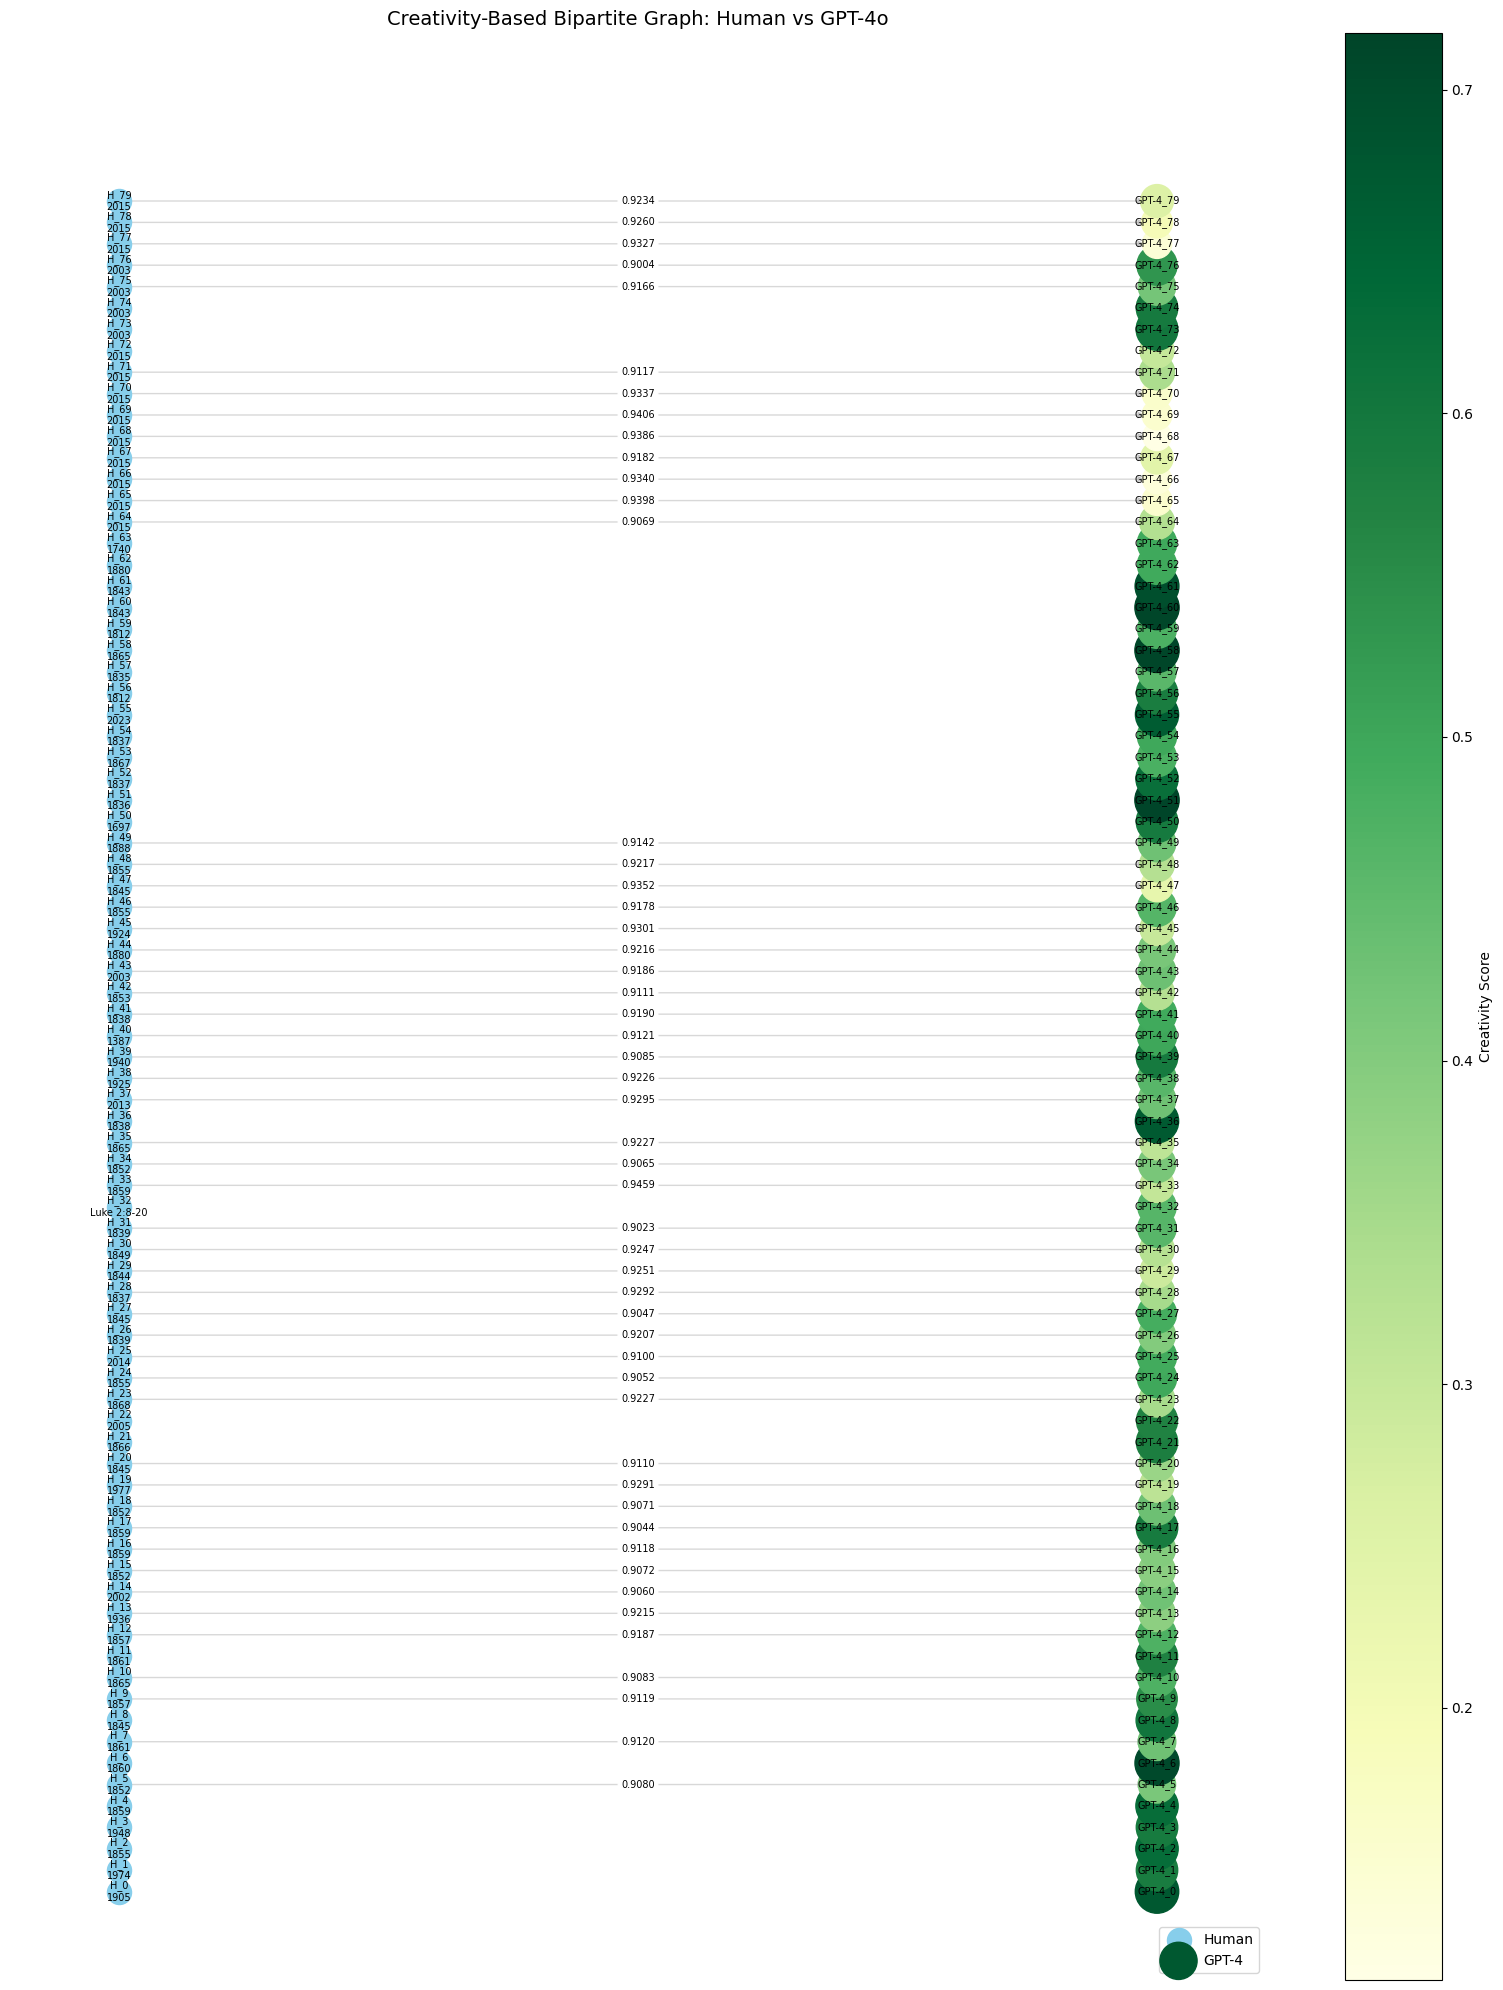

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new graph
G = nx.DiGraph()

# Parameters
model = 'GPT-4'
threshold = 0.9

# Add nodes and edges based on creativity
for i, row in df.iterrows():
    human_node = f"H_{i}"
    llm_node = f"{model}_{i}"
    creativity = row[f'{model}_Creativity']
    similarity = row[f'{model}_Similarity']
    year = row['Year']
    # Add human node
    G.add_node(human_node, bipartite=0, label='Human', year=year)

    # Add LLM node with creativity attribute
    G.add_node(llm_node, bipartite=1, label=model, creativity=creativity)

    # Add edge if similarity is below threshold (more creative)
    if similarity > threshold:
        G.add_edge(human_node, llm_node, weight=similarity)

# Separate nodes
human_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
llm_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

# Positioning for bipartite layout
pos = {}
pos.update((n, (1, i)) for i, n in enumerate(human_nodes))
pos.update((n, (2, i)) for i, n in enumerate(llm_nodes))

# Draw human nodes
plt.figure(figsize=(16, 20))
nx.draw_networkx_nodes(G, pos, nodelist=human_nodes, node_color='skyblue', label='Human')

# Draw LLM nodes with size/color by creativity
llm_creativity = [G.nodes[n]['creativity'] for n in llm_nodes]
node_sizes = [300 + 1000 * c for c in llm_creativity]  # Size scales with creativity
node_colors = llm_creativity

nx.draw_networkx_nodes(G, pos, nodelist=llm_nodes, node_size=node_sizes,
                       node_color=node_colors, cmap=plt.cm.YlGn, label=model)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)

# Labels
edge_labels = {(u, v): f"{d['weight']:.4f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
node_labels = {
    n: f"{n}\n{d['year']}" if d['label'] == 'Human' else n
    for n, d in G.nodes(data=True)
}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)

# Colorbar and title
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlGn, norm=plt.Normalize(vmin=min(llm_creativity), vmax=max(llm_creativity)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='Creativity Score')

plt.title("Creativity-Based Bipartite Graph: Human vs GPT-4o", fontsize=14)
plt.axis('off')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

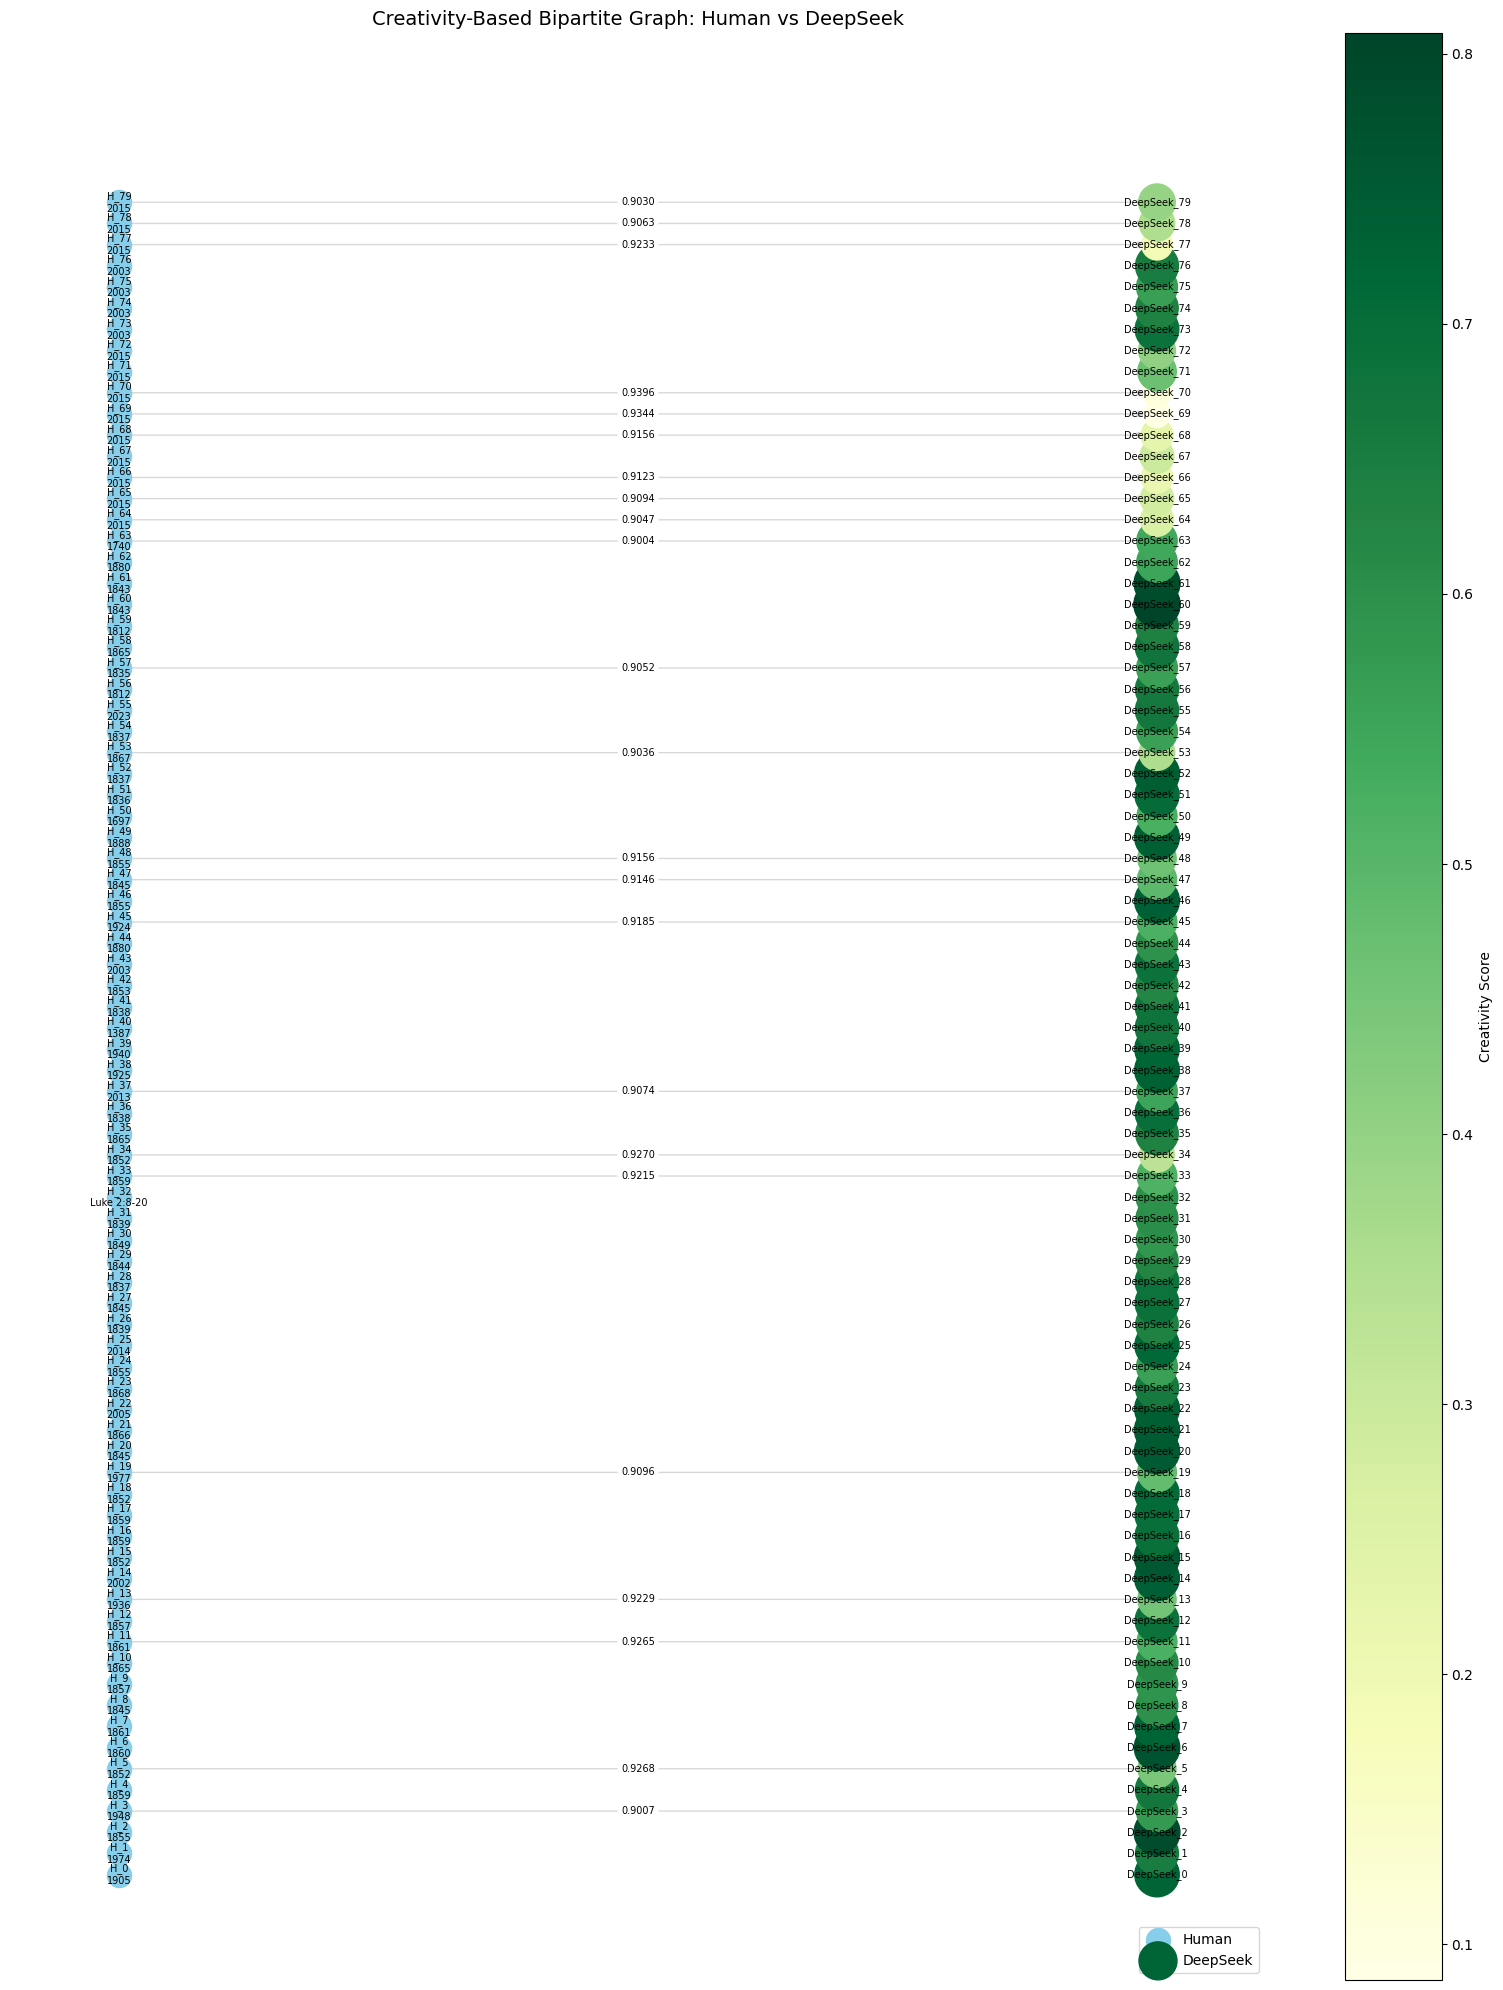

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new graph
G = nx.DiGraph()

# Parameters
model = 'DeepSeek'
threshold = 0.9

# Add nodes and edges based on creativity
for i, row in df.iterrows():
    human_node = f"H_{i}"
    llm_node = f"{model}_{i}"
    creativity = row[f'{model}_Creativity']
    similarity = row[f'{model}_Similarity']
    year = row['Year']
    # Add human node
    G.add_node(human_node, bipartite=0, label='Human', year=year)

    # Add LLM node with creativity attribute
    G.add_node(llm_node, bipartite=1, label=model, creativity=creativity)

    # Add edge if similarity is below threshold (more creative)
    if similarity > threshold:
        G.add_edge(human_node, llm_node, weight=similarity)

# Separate nodes
human_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
llm_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

# Positioning for bipartite layout
pos = {}
pos.update((n, (1, i)) for i, n in enumerate(human_nodes))
pos.update((n, (2, i)) for i, n in enumerate(llm_nodes))

# Draw human nodes
plt.figure(figsize=(16, 20))
nx.draw_networkx_nodes(G, pos, nodelist=human_nodes, node_color='skyblue', label='Human')

# Draw LLM nodes with size/color by creativity
llm_creativity = [G.nodes[n]['creativity'] for n in llm_nodes]
node_sizes = [300 + 1000 * c for c in llm_creativity]  # Size scales with creativity
node_colors = llm_creativity

nx.draw_networkx_nodes(G, pos, nodelist=llm_nodes, node_size=node_sizes,
                       node_color=node_colors, cmap=plt.cm.YlGn, label=model)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)

# Labels
edge_labels = {(u, v): f"{d['weight']:.4f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
node_labels = {
    n: f"{n}\n{d['year']}" if d['label'] == 'Human' else n
    for n, d in G.nodes(data=True)
}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)

# Colorbar and title
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlGn, norm=plt.Normalize(vmin=min(llm_creativity), vmax=max(llm_creativity)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='Creativity Score')

plt.title("Creativity-Based Bipartite Graph: Human vs DeepSeek", fontsize=14)
plt.axis('off')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

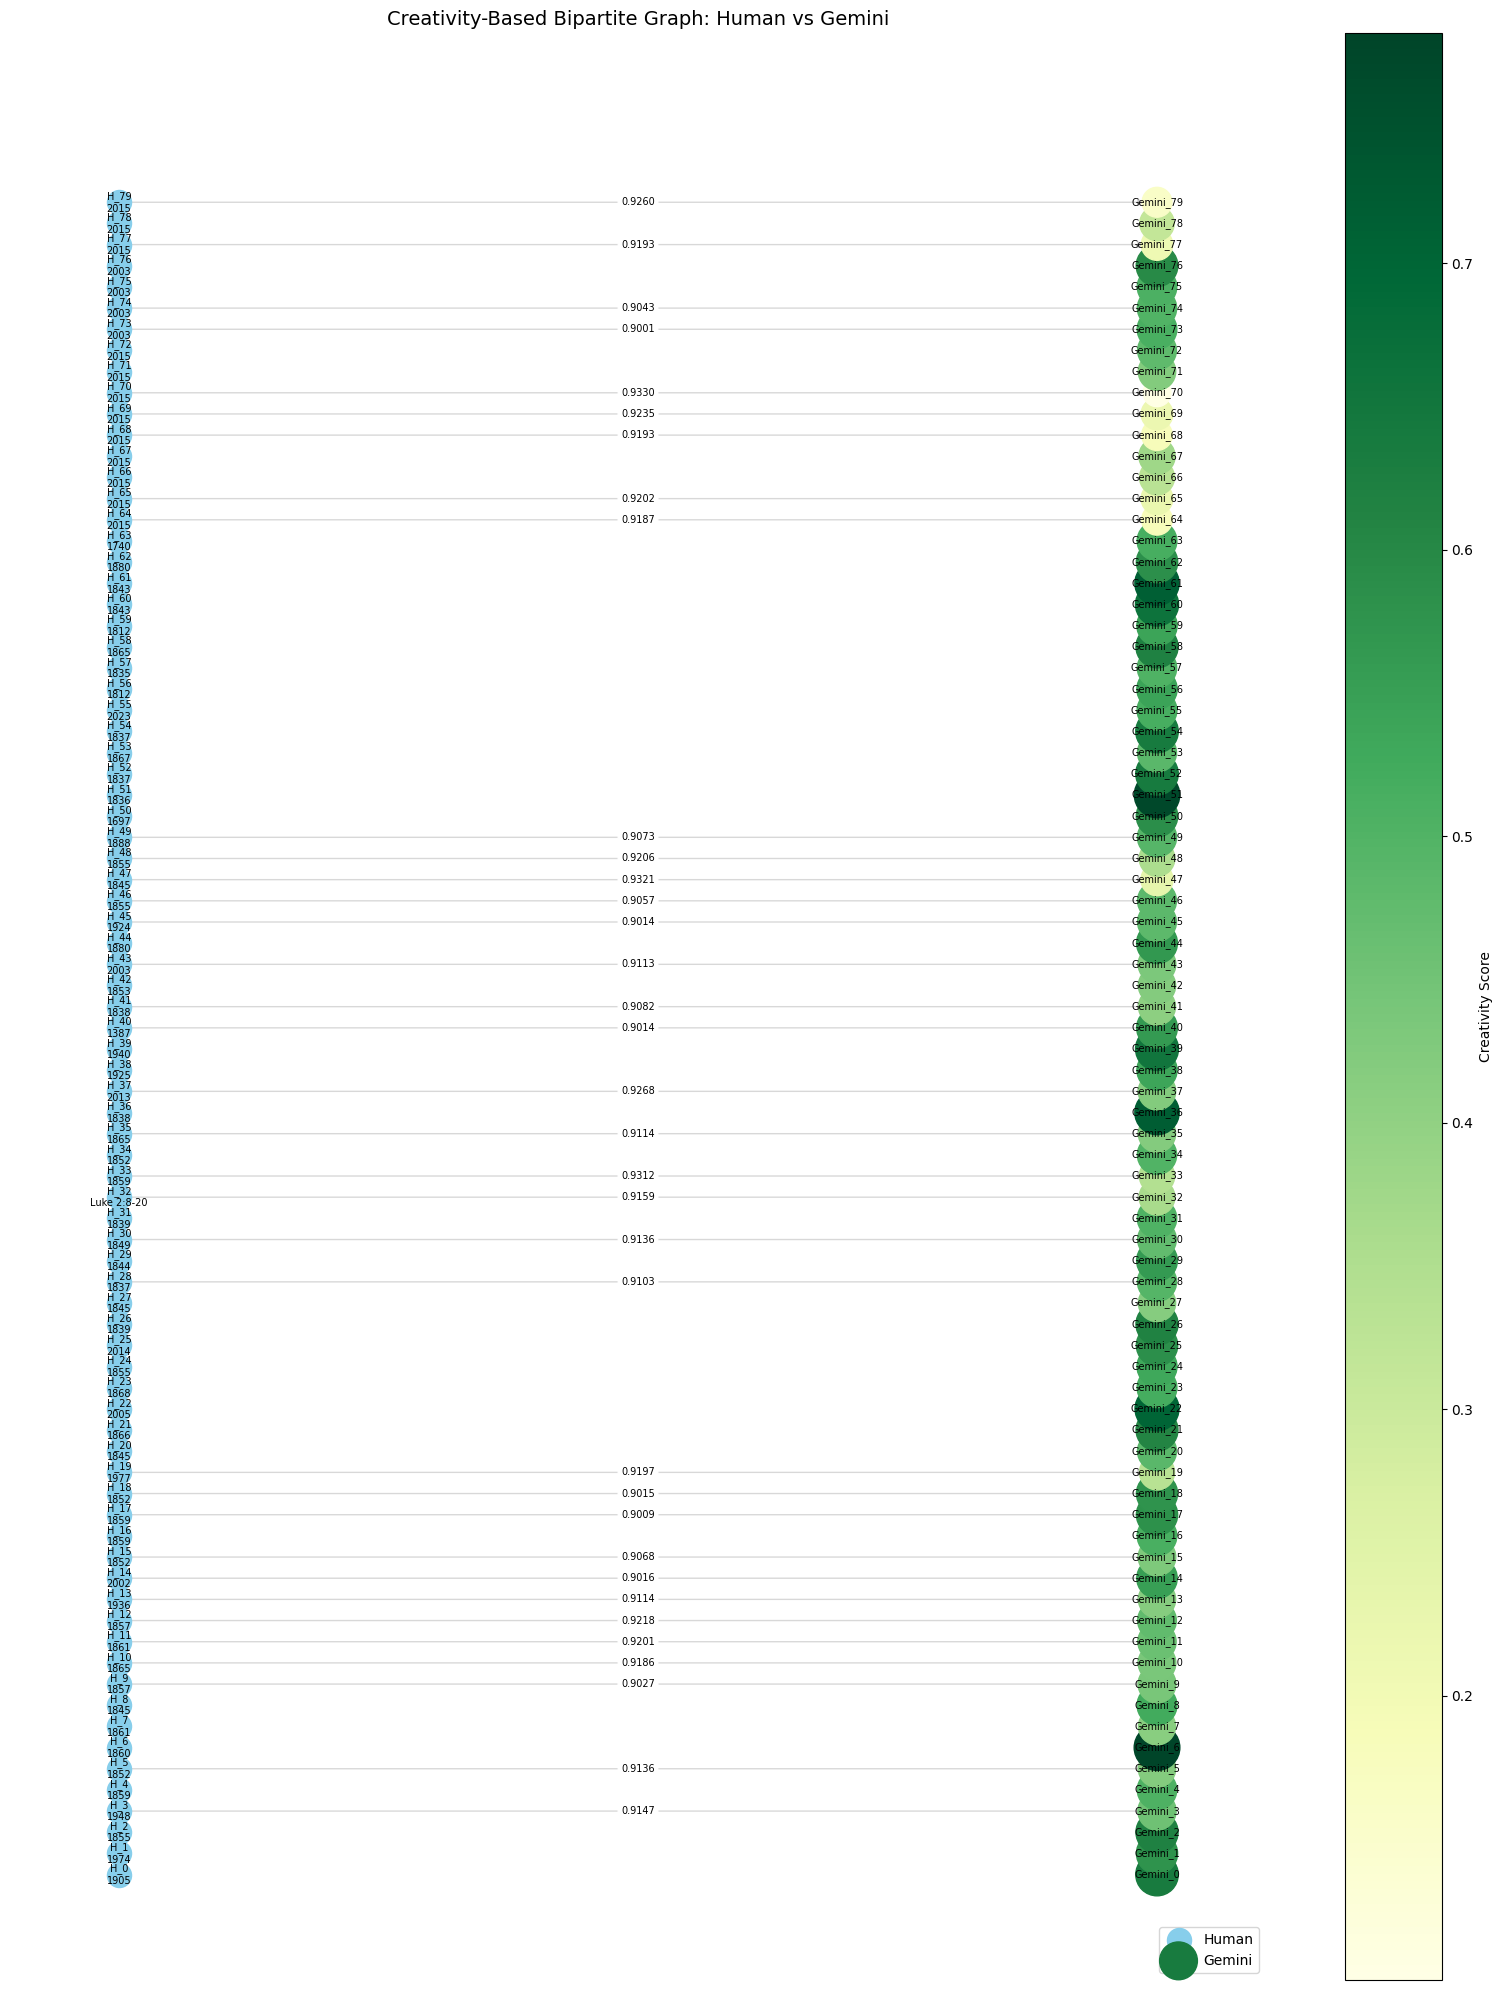

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new graph
G = nx.DiGraph()

# Parameters
model = 'Gemini'
threshold = 0.9

# Add nodes and edges based on creativity
for i, row in df.iterrows():
    human_node = f"H_{i}"
    llm_node = f"{model}_{i}"
    creativity = row[f'{model}_Creativity']
    similarity = row[f'{model}_Similarity']
    year = row['Year']
    # Add human node
    G.add_node(human_node, bipartite=0, label='Human', year=year)

    # Add LLM node with creativity attribute
    G.add_node(llm_node, bipartite=1, label=model, creativity=creativity)

    # Add edge if similarity is below threshold (more creative)
    if similarity > threshold:
        G.add_edge(human_node, llm_node, weight=similarity)

# Separate nodes
human_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
llm_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

# Positioning for bipartite layout
pos = {}
pos.update((n, (1, i)) for i, n in enumerate(human_nodes))
pos.update((n, (2, i)) for i, n in enumerate(llm_nodes))

# Draw human nodes
plt.figure(figsize=(16, 20))
nx.draw_networkx_nodes(G, pos, nodelist=human_nodes, node_color='skyblue', label='Human')

# Draw LLM nodes with size/color by creativity
llm_creativity = [G.nodes[n]['creativity'] for n in llm_nodes]
node_sizes = [300 + 1000 * c for c in llm_creativity]  # Size scales with creativity
node_colors = llm_creativity

nx.draw_networkx_nodes(G, pos, nodelist=llm_nodes, node_size=node_sizes,
                       node_color=node_colors, cmap=plt.cm.YlGn, label=model)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)

# Labels
edge_labels = {(u, v): f"{d['weight']:.4f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
node_labels = {
    n: f"{n}\n{d['year']}" if d['label'] == 'Human' else n
    for n, d in G.nodes(data=True)
}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)

# Colorbar and title
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlGn, norm=plt.Normalize(vmin=min(llm_creativity), vmax=max(llm_creativity)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='Creativity Score')

plt.title("Creativity-Based Bipartite Graph: Human vs Gemini", fontsize=14)
plt.axis('off')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
df[['GPT-4_Creativity', 'DeepSeek_Creativity', 'Gemini_Creativity']].mean()

,0
GPT-4_Creativity,0.449095
DeepSeek_Creativity,0.580960
Gemini_Creativity,0.483853


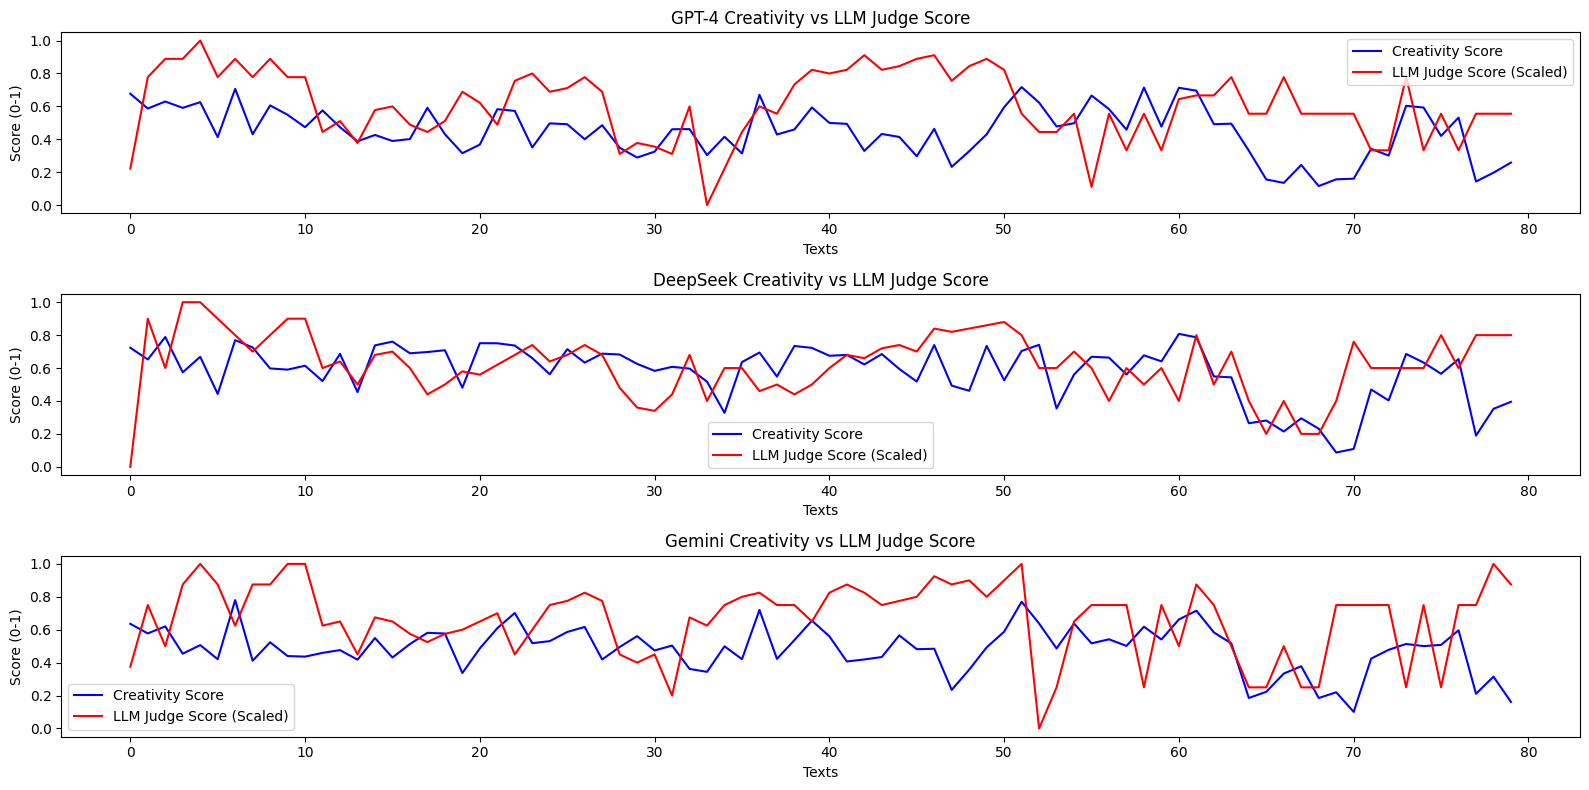

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Normalize LLM judge scores to the range [0, 1]
scaler = MinMaxScaler()
df[['GPT-4_JudgeScore_Scaled', 'DeepSeek_JudgeScore_Scaled', 'Gemini_JudgeScore_Scaled']] = \
    scaler.fit_transform(df[['C_Jugde', 'D_Judge', 'G_Judge']])

# Step 2: Plot the creativity and judge scores for comparison
plt.figure(figsize=(16, 8))

# Plot for GPT-4
plt.subplot(3, 1, 1)
plt.plot(df['GPT-4_Creativity'], label='Creativity Score', color='b')
plt.plot(df['GPT-4_JudgeScore_Scaled'], label='LLM Judge Score (Scaled)', color='r')
plt.title("GPT-4 Creativity vs LLM Judge Score")
plt.xlabel("Texts")
plt.ylabel("Score (0-1)")
plt.legend()

# Plot for DeepSeek
plt.subplot(3, 1, 2)
plt.plot(df['DeepSeek_Creativity'], label='Creativity Score', color='b')
plt.plot(df['DeepSeek_JudgeScore_Scaled'], label='LLM Judge Score (Scaled)', color='r')
plt.title("DeepSeek Creativity vs LLM Judge Score")
plt.xlabel("Texts")
plt.ylabel("Score (0-1)")
plt.legend()

# Plot for Gemini
plt.subplot(3, 1, 3)
plt.plot(df['Gemini_Creativity'], label='Creativity Score', color='b')
plt.plot(df['Gemini_JudgeScore_Scaled'], label='LLM Judge Score (Scaled)', color='r')
plt.title("Gemini Creativity vs LLM Judge Score")
plt.xlabel("Texts")
plt.ylabel("Score (0-1)")
plt.legend()

plt.tight_layout()
plt.show()